In [3]:
# check if gpus available
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

# import the package dependencies
from glob import glob as gb #get filenames from path
from load_data_make_spectrogram import proc_data
#from load_data_make_timeseries import proc_data
import numpy as np # number computation package
import time # for calculating runtime
import pandas as pd
import matplotlib.pyplot as plt

import importlib
import keras
import scipy.io as sio

# # # # # # # # # # #
t00= time.time()

['../../../Hawaii_data/DASARs/PB20gsif/PB20X0/PB20X0T20200225T000000.gsi'] ../../../Hawaii_data/DASARs/PB20gsif/PB20X0/
(92736, 90, 20, 6)


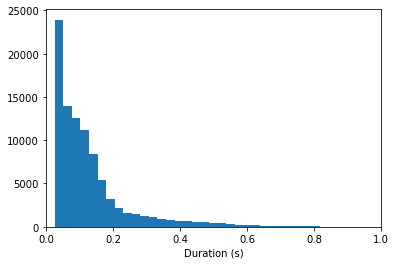

0


In [5]:
%run -i 'set_params.py'
files = sorted(gb(dpath + '*X*225*.gsi'))
print(files, dpath)

inddct = sio.loadmat(spath + 'PB20ZYX0T20200225T000000_1439minDur_Ind_Trel.mat')
ind = inddct['ind']
dur = inddct['dur'][0]
Nevent = len(dur)
trel = inddct['trel']
#print(nF,nL)
input_matrix = np.zeros((Nevent, nF, nL+1, 6), dtype=float)
print(input_matrix.shape)#, z.shape, ind[:,-1]
plt.hist(dur,bins=0.0256*np.arange(0,40))
plt.xlim((0,1))
plt.xlabel('Duration (s)')
plt.show()

# create a list indexed by day
i=0
tick=0
ind_list = []
dur_list = []
placeholder1 = []
placeholder2 = []
for i in range(ind.shape[1]-1):
    if (np.abs(ind[2,i]-ind[2,i+1])<10**6):
        placeholder1.append(ind[2,i])
        placeholder2.append(dur[i])
    else:
        ind_list.append(placeholder1)
        dur_list.append(placeholder2)
        print('finishing ' + files[tick])
        tick=tick+1
        placeholder1 = []
        placeholder2 = []
print(tick)
if tick==0:
    ind_list.append(placeholder1)
    dur_list.append(placeholder2)

# # remove first day
#files = files[1:]
#del ind_list[0]
#del dur_list[0]

## Run these cells to generate the data

In [6]:
# # # # use TS data
tstart = [0,0,0,0,0]
tsample = [23.99*3600,23.99*3600,23.99*3600,23.99*3600,23.99*3600]
input_matrix = proc_data(files, tstart, tsample, ind_list, dur_list, Nevent)
print(input_matrix.shape)

Now processing ../../../Hawaii_data/DASARs/PB20gsif/PB20X0/PB20X0T20200225T000000.gsi
174.95786905288696
(92736, 90, 20, 3)


In [7]:
print(ind_list[-1][-1]/Fs/3600, dur_list[-1][-1])
print (input_matrix.shape)
print(len(dur[dur<=0.5])/len(dur))
np.save(spath + 'Feb25_det_90_120_trunc049sfull_025sbuff_nfft256_3D.npy',input_matrix)

23.9828075 0.025999999999999995
(92736, 90, 20, 3)
0.9779805037957212
